---

<center><h1><font color=Brown> Data Pre-Processing </font></h1></center>

- In this noterbook we will see how tp prepare the data before get into analysis. here we should see how to load the data, how to handle missing values, How to impute them and How to handle outliers etc. For this purpose here we are going to use titanic dataset.

---

### <font color = Brown> 1. Deleting Missing Values </font>


### <font color = DarkBlue> 1.1. Loading Data </font>

In [24]:
#import required libratries
import pandas as pd

In [25]:
# Loading data
data = pd.read_csv('C:/Users/sivak/OneDrive/Documents/Datasets/titanic_train.csv')

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# shape of the data
data.shape

(891, 12)

### <font color = DarkBlue> 1.2. Missing Values</font>

In [28]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age and Cabin have a very high number of missing values
- Embarked has very low number of missing values

### <font color = DarkBlue> 1.3. Deleting Data points with missing values</font>

In [29]:
# Age variable without missing values treatment
data['Age'].head(6)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
Name: Age, dtype: float64

In [30]:
# dropping all rows with missing values
data_row_del = data.dropna(axis=0)
data_row_del['Age']

1      38.0
3      35.0
6      54.0
10      4.0
11     58.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 183, dtype: float64

- Have deleted rows, if any one column/ feature has missing values in that row

In [31]:
# shape before and after removing missing values
data.shape, data_row_del.shape

((891, 12), (183, 12))

- Significant loss of information
- Only three columns had missing values
- So, we can try to delete columns which have missing values

### <font color = DarkBlue> 1.4. Deleting columns with missing values</font>

In [32]:
#is null with ratio
(data.isnull().sum())/891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [33]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [34]:
# dropping all columns with missing values

data_col_del = data.dropna(thresh = 500, axis=1)
data_col_del.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
# shape before and after removing missing values
data.shape, data_col_del.shape

((891, 12), (891, 11))

- A better way to deal with missing values without loss of information?

### <font color = Brown> 2. Replacing Missing Values </font>

In [36]:
data['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [38]:
## make a copy
data_replace = data.copy()

In [39]:
data_replace['Cabin'].fillna(value='missing')

0      missing
1          C85
2      missing
3         C123
4      missing
        ...   
886    missing
887        B42
888    missing
889       C148
890    missing
Name: Cabin, Length: 891, dtype: object

In [40]:
data_replace['Age'].fillna(value=999)

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
       ...  
886     27.0
887     19.0
888    999.0
889     26.0
890     32.0
Name: Age, Length: 891, dtype: float64

In [41]:
data_replace['Cabin_na'] = (data['Cabin'].isnull().astype('int'))

In [42]:
data_replace.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_na
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


- Similarly we can do for 'Embarked'
- Can we impute missing values with more sensible numbers?

### <font color = Brown> 3. Imputing Missing Values Using central tendency </font>

In [44]:
# finding mean value
mean_v1 = data['Age'].mean()
mean_v1

29.69911764705882

In [45]:
# making a copy
data_cleaned = data.copy()

# imputing missing values
data_cleaned['Age'] = data_cleaned['Age'].fillna(value=mean_v1)
data_cleaned['Age'].isnull().sum()

0

In [46]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [47]:
mode_v1 = data['Embarked'].mode()
mode_v1

0    S
dtype: object

In [52]:
data_cleaned['Embarked'] = data_cleaned['Embarked'].fillna(value = 'S')
data_cleaned.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### <font color = Brown> 4. Using relationship with other feature(s) </font>

- During Exploration, did we find a high dependency on other variables? 
- Fare can be imputed based on PClass-wise mean (not overall mean) 

In [53]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [54]:
(data[['Name', 'Age']].loc[(data['Age'].isnull()>0)]).head(20)

,Name,Age
5,"Moran, Mr. James",NaN
17,"Williams, Mr. Charles Eugene",NaN
19,"Masselmani, Mrs. Fatima",NaN
26,"Emir, Mr. Farred Chehab",NaN
28,"O'Dwyer, Miss. Ellen ""Nellie""",NaN
29,"Todoroff, Mr. Lalio",NaN
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN
32,"Glynn, Miss. Mary Agatha",NaN
36,"Mamee, Mr. Hanna",NaN
42,"Kraeff, Mr. Theodor",NaN


### <font color = Brown> 5. Dealing with Categorical Variable </font>

In [55]:
#Categorical variables in the data
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [77]:
#number of unique values
data[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

- Can One-hot-Encode Sex and Embarked
- Deal with them differently (extract features)
- Name, Ticket and Cabin (when encoded) will have zeros

### <font color = DarkBlue> 5.1. One - hot Encoding</font>

In [78]:
## One-hot Encoding
pd.get_dummies(data['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [79]:
data_cleaned = data_cleaned.drop(['Name','Ticket','Cabin'], axis=1)

In [82]:
data_cleaned = pd.get_dummies(data_cleaned)
data_cleaned.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


- SibSp and Parch hold discrete values
- We can convert them into separate columns as well

### <font color = DarkBlue> 5.2. Label Encoding</font>

In [83]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
## map function
data['Embarked'].map({'Q':0, 'S':1, 'C':2})

0      1.0
1      2.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    1.0
888    1.0
889    2.0
890    0.0
Name: Embarked, Length: 891, dtype: float64

In [85]:
data['Embarked'] = data['Embarked'].map({'Q':0, 'S':1, 'C':2})
data['Embarked'].head()

0    1.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: Embarked, dtype: float64

### <font color = Brown> 6. Outlier Treatment </font>

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
# Loading data
data = pd.read_csv('C:/Users/sivak/OneDrive/Documents/Datasets/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Fare has some extreme values

In [118]:
data['Fare'].quantile(0.25), data['Fare'].quantile(0.75)

(7.9104, 31.0)

In [119]:
IQR = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
IQR

23.0896

In [120]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-26.724, 65.6344)

In [121]:
#Delete Outliers
data.loc[data['Fare']>66]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [122]:
data_new = data.loc[data['Fare']<66]
data.shape, data_new.shape

((891, 12), (775, 12))

In [123]:
data['Fare'].loc[data['Fare']<7]

129    6.9750
143    6.7500
179    0.0000
202    6.4958
263    0.0000
271    0.0000
277    0.0000
302    0.0000
326    6.2375
371    6.4958
378    4.0125
411    6.8583
413    0.0000
466    0.0000
481    0.0000
597    0.0000
633    0.0000
654    6.7500
674    0.0000
732    0.0000
804    6.9750
806    0.0000
815    0.0000
818    6.4500
822    0.0000
825    6.9500
843    6.4375
872    5.0000
Name: Fare, dtype: float64

In [124]:
#Replacing Outliers
data['Fare'].loc[data['Fare']<7] = Q1

In [125]:
data['Fare'].loc[data['Fare']<7]

Series([], Name: Fare, dtype: float64)

In [126]:
data['Fare'][872]

7.9104

### <font color = Brown> 7. Transforming Variables </font>

<AxesSubplot:>

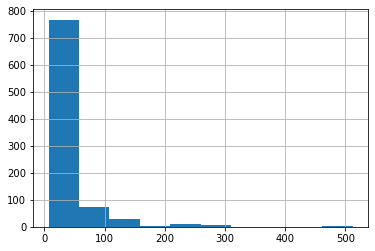

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline
(data['Fare']).hist()

In [128]:
import numpy as np

<AxesSubplot:>

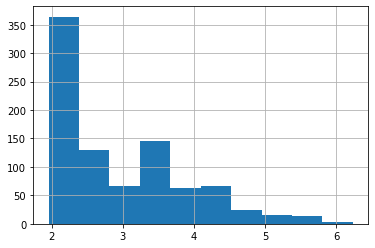

In [129]:
(np.log(data['Fare'])).hist()